# Lead Scoring Case Study

# Importing Librarys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import statsmodels
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Data Set

In [3]:
ds = pd.read_csv('Leads.csv')

# Check the Data

In [4]:
ds.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
ds.shape

(9240, 37)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
ds.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
ds.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

# Data Cleaning

In [9]:
ds.duplicated().sum()

0

There is no duplicated values

In [10]:
# Replacing Select to NaN

ds.replace({'Select': np.nan}, inplace=True)

In [11]:
# Check the data after replacing Select

ds.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Checking the Null values

In [12]:
ds.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
missing = ds.isna().sum()/len(ds)*100
missing

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

### Finding data having missing values more then 40%

In [14]:
missing_columns = list(missing[missing>40].index)
missing_columns

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [15]:
# Droping the columns having missing values more then 40%

ds.drop(missing_columns, axis=1, inplace=True)

In [16]:
# Checking data shape
ds.shape

(9240, 30)

In [17]:
#Creating the list of columns to be dropped

#Add 'Prospect ID' and 'Lead Number' to this list as these are id columns and there is no use to analysis

drop_col = ['Prospect ID', 'Lead Number']

### Checking data having missing values less then 40%

In [18]:
missing_2 = ds.isna().sum()/len(ds)*100
missing_2[missing_2>0].sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
dtype: float64

In [19]:
ds.City.value_counts(dropna = False,normalize=True)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [20]:
# As city column has 39% missing values so I am replacing this with "Missing"

ds.City.fillna('Missing', inplace=True)

In [21]:
# Checking NA vales

ds.City.isna().sum()

0

In [22]:
ds.Specialization.value_counts(dropna=False, normalize=True)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [23]:
# As Specialization column has 36% missing values so I am replacing this with "Missing"

ds.Specialization.fillna('Missing', inplace=True)

In [24]:
# Checking NA vales

ds.Specialization.isna().sum()

0

In [25]:
ds.Tags.value_counts(dropna=False, normalize=True)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

In [26]:
# As Tags column has 36% missing values so I am replacing this with "Unknown"

ds.Tags.fillna('Unknown', inplace=True)

In [27]:
# Checking NA vales

ds.Tags.isna().sum()

0

In [28]:
ds['What matters most to you in choosing a course'].value_counts(dropna=False, normalize=True)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

As almost 71% of data is Batter Career Prospects. So I am droping this column as it is not usefull for analysis

In [29]:
drop_col.append('What matters most to you in choosing a course')
drop_col

['Prospect ID', 'Lead Number', 'What matters most to you in choosing a course']

In [30]:
ds['What is your current occupation'].value_counts(dropna=False, normalize=True)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [31]:
# Filling the NA values with Mode i.e. 'Unemployed'

ds['What is your current occupation'].fillna('Unemployed', inplace=True)

In [32]:
# Checking NA vales

ds['What is your current occupation'].isna().sum()

0

In [33]:
ds.Country.value_counts(dropna=False, normalize=True)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

Almost all the countries are India other then NA. So I am droping this column as it is not usefull for analysis

In [34]:
drop_col.append('Country')
drop_col

['Prospect ID',
 'Lead Number',
 'What matters most to you in choosing a course',
 'Country']

In [35]:
ds.TotalVisits.value_counts(dropna=False, normalize=True)*100

0.0      23.690476
2.0      18.181818
3.0      14.134199
4.0      12.121212
5.0       8.474026
6.0       5.043290
1.0       4.274892
7.0       3.344156
8.0       2.424242
9.0       1.774892
NaN       1.482684
10.0      1.233766
11.0      0.930736
13.0      0.519481
12.0      0.487013
14.0      0.389610
16.0      0.227273
15.0      0.194805
17.0      0.173160
18.0      0.162338
20.0      0.129870
19.0      0.097403
21.0      0.064935
23.0      0.064935
24.0      0.054113
25.0      0.054113
27.0      0.054113
22.0      0.032468
29.0      0.021645
28.0      0.021645
26.0      0.021645
141.0     0.010823
55.0      0.010823
30.0      0.010823
43.0      0.010823
74.0      0.010823
41.0      0.010823
54.0      0.010823
115.0     0.010823
251.0     0.010823
32.0      0.010823
42.0      0.010823
Name: TotalVisits, dtype: float64

In [36]:
# Filling median inplace of NA

m1 = ds.TotalVisits.median()
ds.TotalVisits.fillna(m1, inplace=True)

In [37]:
# Filling median inplace of NA

m2 = ds['Page Views Per Visit'].median()
ds['Page Views Per Visit'].fillna(m2, inplace=True)

In [38]:
# Filling mode inplace of NA

ds['Last Activity'].fillna('Email Opened', inplace=True)

In [39]:
# combining less % values in 'Other' category

a = ds['Last Activity'].value_counts(dropna=False, normalize=True)*100

ds['Last Activity'].replace(list(a[a<2].index), 'Other', inplace=True)

ds['Last Activity'].value_counts(normalize=True)*100

Email Opened               38.311688
SMS Sent                   29.707792
Olark Chat Conversation    10.530303
Page Visited on Website     6.926407
Converted to Lead           4.632035
Email Bounced               3.528139
Other                       3.474026
Email Link Clicked          2.889610
Name: Last Activity, dtype: float64

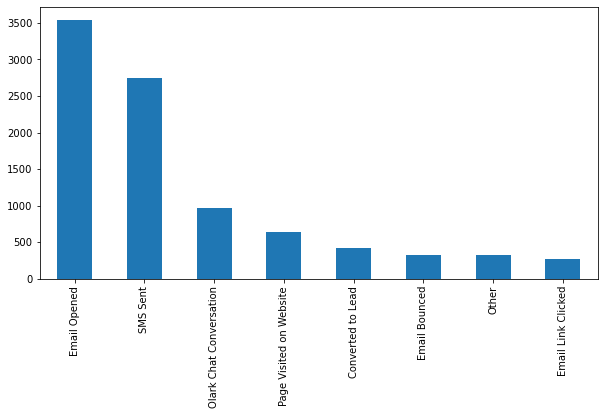

In [40]:
plt.figure(figsize=(10, 5))
ds['Last Activity'].value_counts().plot.bar()
plt.show()

In [41]:
ds['Lead Source'].value_counts(dropna=False, normalize=True)*100


Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [42]:
# Filling mode inplace of NA

ds['Lead Source'].fillna('Google', inplace=True)

In [43]:
# combining less % values in 'Other' category

b = ds['Lead Source'].value_counts(dropna=False, normalize=True)*100

ds['Lead Source'].replace(list(b[b<2].index), 'Other', inplace=True)

ds['Lead Source'].value_counts(normalize=True)*100

Google            31.428571
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          5.779221
Other              3.787879
Name: Lead Source, dtype: float64

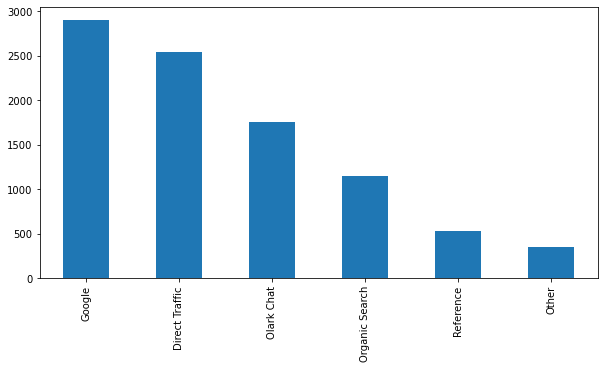

In [44]:
plt.figure(figsize=(10, 5))
ds['Lead Source'].value_counts().plot.bar()
plt.show()

In [45]:
# Droping the columns in drop_col

ds.drop(drop_col, axis=1, inplace=True)

In [46]:
# Checking NA values

ds.isna().sum()/len(ds)*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

### Finding Outliers

In [47]:
ds.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [48]:
num_col =list( ds.describe().columns)
num_col

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

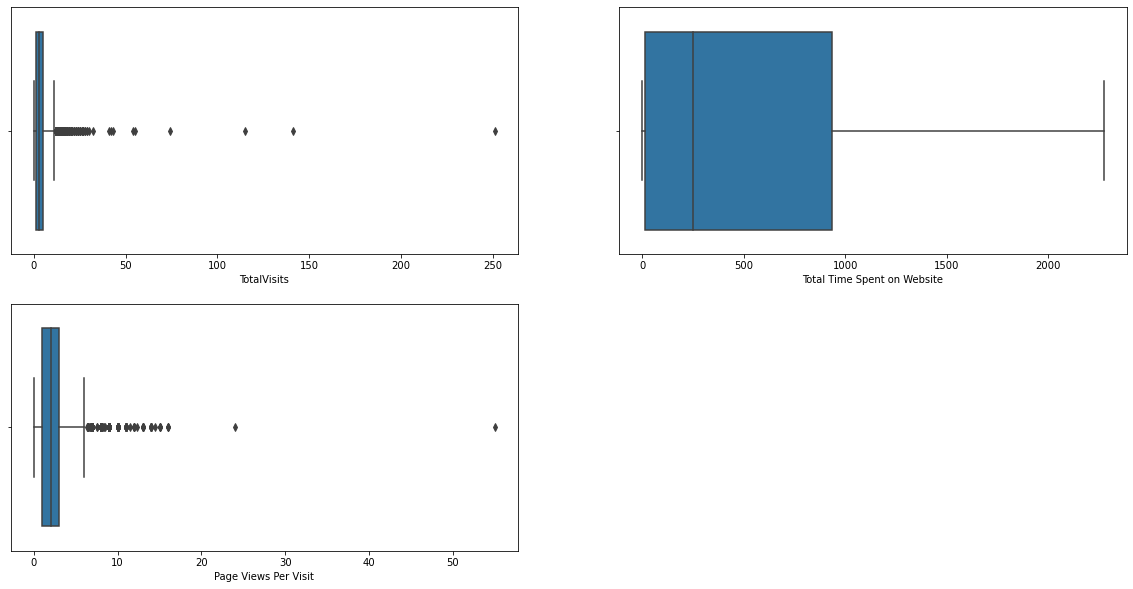

In [49]:
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.boxplot(x = num_col[1], data = ds)
plt.subplot(2,2,2)
sns.boxplot(x = num_col[2], data = ds)
plt.subplot(2,2,3)
sns.boxplot(x = num_col[3], data = ds)
plt.show()

There are outlier in TotalVisits and Page Views per visits 

In [50]:
# checking with all percentiles

ds.describe(percentiles=[0.25,0.50,0.75,0.90,0.95,0.97,0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000
97%,1.000000,11.000000,1660.000000,7.000000


In [51]:
x = ds['TotalVisits'].quantile(0.99)
y = ds['Page Views Per Visit'].quantile(0.99)

In [52]:
ds = ds[~((ds['TotalVisits'] > x) | (ds['Page Views Per Visit'] > y))]
ds.shape

(9090, 26)

In [53]:
# Rechecking the data

ds.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9090.000000,9090.000000,9090.000000,9090.000000
mean,0.384488,3.140924,484.243784,2.262836
std,0.486501,2.881884,547.243973,1.881164
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,4.000000,930.000000,3.000000
max,1.000000,17.000000,2272.000000,9.000000


# EDA

### Checking the Imbalance Percentage

In [54]:
ds.Converted.value_counts(normalize=True)*100

0    61.551155
1    38.448845
Name: Converted, dtype: float64

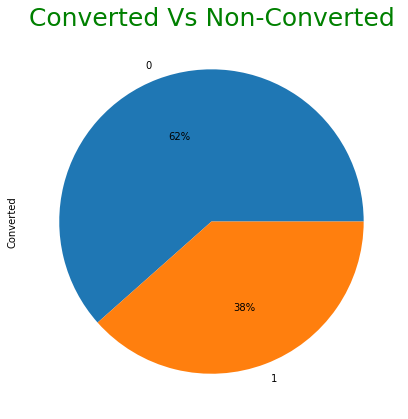

In [55]:
ds.Converted.value_counts(normalize=True).plot.pie(figsize=(15,7), autopct='%1.f%%')
plt.title('Converted Vs Non-Converted',fontdict={'fontsize': 25, 'fontweight': 5,  'color':'Green'})
plt.show()

In [56]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9090 non-null   object 
 1   Lead Source                               9090 non-null   object 
 2   Do Not Email                              9090 non-null   object 
 3   Do Not Call                               9090 non-null   object 
 4   Converted                                 9090 non-null   int64  
 5   TotalVisits                               9090 non-null   float64
 6   Total Time Spent on Website               9090 non-null   int64  
 7   Page Views Per Visit                      9090 non-null   float64
 8   Last Activity                             9090 non-null   object 
 9   Specialization                            9090 non-null   object 
 10  What is your current occupation     

In [57]:
# Catagorical columns

cat_col = list(ds.select_dtypes(include=object).columns)
cat_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

### Catagorical Variables Analysis

In [58]:
# Checking the No of variables in the columns

ds[cat_col].nunique().sort_values()

X Education Forums                           1
I agree to pay the amount through cheque     1
Get updates on DM Content                    1
Update me on Supply Chain Content            1
Receive More Updates About Our Courses       1
Magazine                                     1
Do Not Email                                 2
Do Not Call                                  2
Search                                       2
Newspaper Article                            2
A free copy of Mastering The Interview       2
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
Lead Origin                                  5
Lead Source                                  6
What is your current occupation              6
City                                         7
Last Activity                                8
Last Notable Activity                       16
Specialization                              19
Tags         

In [59]:
# Finding the columns having only one variable as it has no use to analysis 

one = ds[cat_col].nunique()

drop_columns = list(one[one<2].index)
drop_columns

['Magazine',
 'X Education Forums',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [60]:
# droping the drop columns

ds.drop(drop_columns, axis=1, inplace=True)

In [61]:
cat_col = list(set(cat_col) - set(drop_columns))

ds[cat_col].nunique().sort_values()

Search                                     2
A free copy of Mastering The Interview     2
Do Not Email                               2
Newspaper                                  2
Through Recommendations                    2
Do Not Call                                2
Digital Advertisement                      2
Newspaper Article                          2
Lead Origin                                5
What is your current occupation            6
Lead Source                                6
City                                       7
Last Activity                              8
Last Notable Activity                     16
Specialization                            19
Tags                                      27
dtype: int64

In [62]:
two = ds[cat_col].nunique()

two_var = list(two[two == 2].index)

two_var

['Search',
 'A free copy of Mastering The Interview',
 'Do Not Email',
 'Newspaper',
 'Through Recommendations',
 'Do Not Call',
 'Digital Advertisement',
 'Newspaper Article']

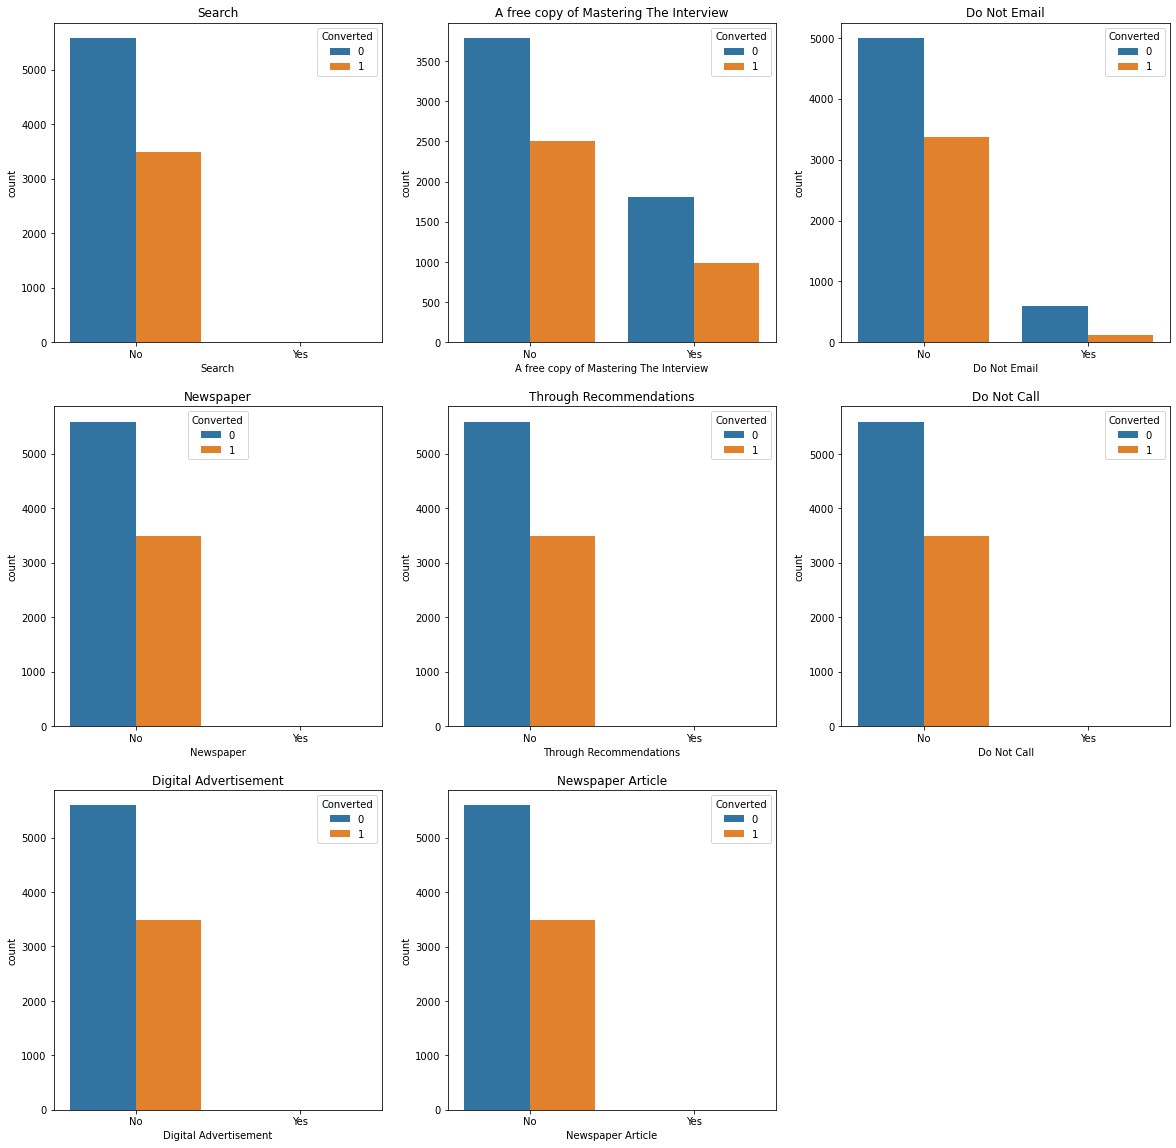

In [63]:
plt.figure(figsize = (20,20))

for i in range(len(two_var)):

    plt.subplot(3,3,i+1)
    sns.countplot(x = two_var[i],hue= 'Converted', data=ds)
    plt.title(two_var[i])
    

It's looks that some columns have moslty 1 variable present in the data i.e 'No' 

In [64]:
drop_col = ['Newspaper','Do Not Call','Search','Digital Advertisement','Newspaper Article','Through Recommendations']

# Droping the columns

ds.drop(drop_col, axis=1, inplace=True)

In [65]:
two_var  = list(set(two_var) - set(drop_col))
two_var

['Do Not Email', 'A free copy of Mastering The Interview']

In [66]:
def conversion_rate_plot(x, y = 'Converted', p = 'deep'):
    ax = sns.barplot(ds[x], ds[y], estimator = np.mean, palette = p, ci = None)
    for k in ax.patches:
        ax.annotate('{:.1f} %'.format(k.get_height()*100),(k.get_x()+0.25, k.get_height()))

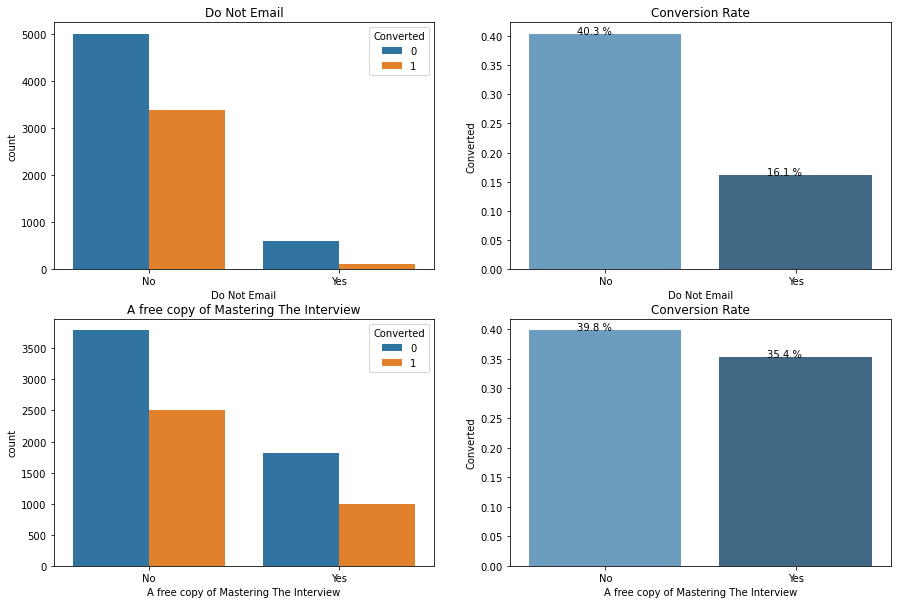

In [67]:
plt.figure(figsize = (15,10))

for i in range(len(two_var)):

    plt.subplot(2,2,2*i+1)
    sns.countplot(x = two_var[i],hue= 'Converted', data=ds)
    plt.title(two_var[i])
    
    # Rate of conversion
    plt.subplot(2, 2, 2*i+2)
    conversion_rate_plot(two_var[i], 'Converted', p = 'Blues_d')
    plt.title('Conversion Rate')
    

- The customers who choose Do not Email about the course are converted more as compair to those who want email
- The Customers who don't want free copy of mastering the interview have little bit more conversion rate

In [68]:
ds['Lead Origin'].value_counts()

Landing Page Submission    4769
API                        3548
Lead Add Form               717
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [69]:
# Replacing 'Quick add form' to 'Landing Page Submission'

ds['Lead Origin'].replace({'Quick Add Form': 'Landing Page Submission'}, inplace=True)

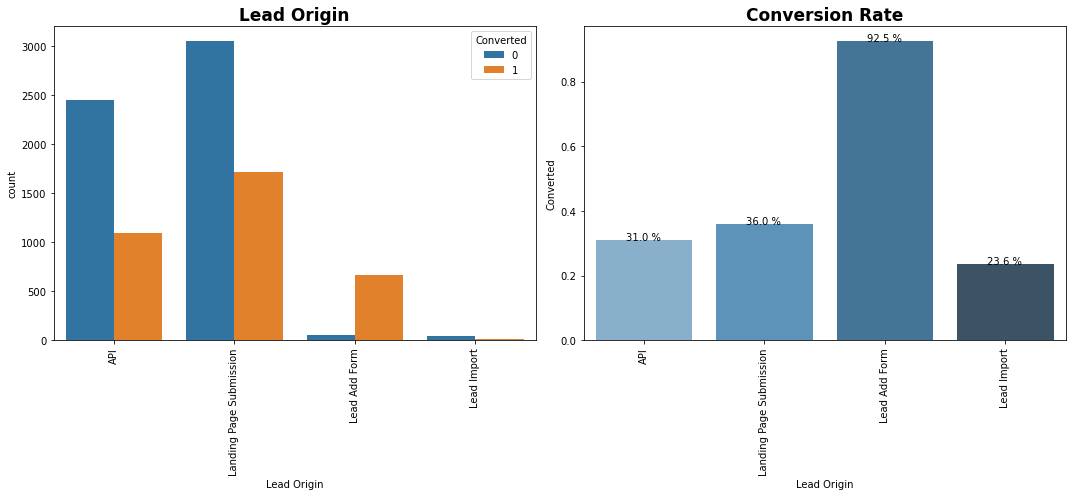

In [70]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.countplot(x = 'Lead Origin', hue='Converted', data=ds)
plt.title('Lead Origin', fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})
plt.xticks(rotation = 90)

# Rate of conversion
plt.subplot(1,2,2)
conversion_rate_plot('Lead Origin', 'Converted', p = 'Blues_d')
plt.title('Conversion Rate', fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})
plt.xticks(rotation = 90)

plt.tight_layout()

- Although the no of customers are in API and Landing page submission are more but conversion rate of Lead add form is highest 92.5%

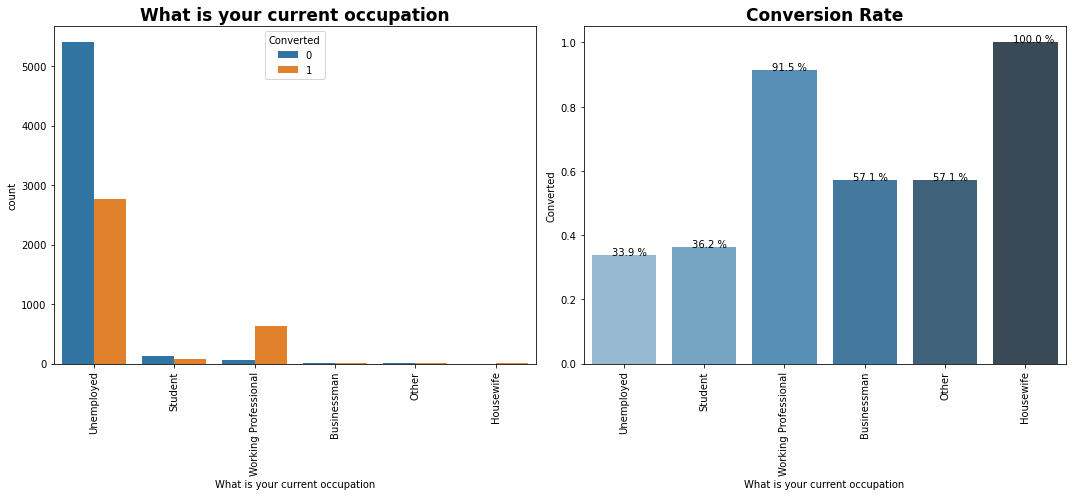

In [71]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.countplot(x = 'What is your current occupation', hue='Converted', data=ds)
plt.title('What is your current occupation', fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})
plt.xticks(rotation = 90)

# Rate of conversion
plt.subplot(1,2,2)
conversion_rate_plot('What is your current occupation', 'Converted', p = 'Blues_d')
plt.title('Conversion Rate', fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})
plt.xticks(rotation = 90)

plt.tight_layout()

- The no of customers in unemployed is more but conversion rate of working professional is most 91.5% apart from housewife as they are very less in numbers.

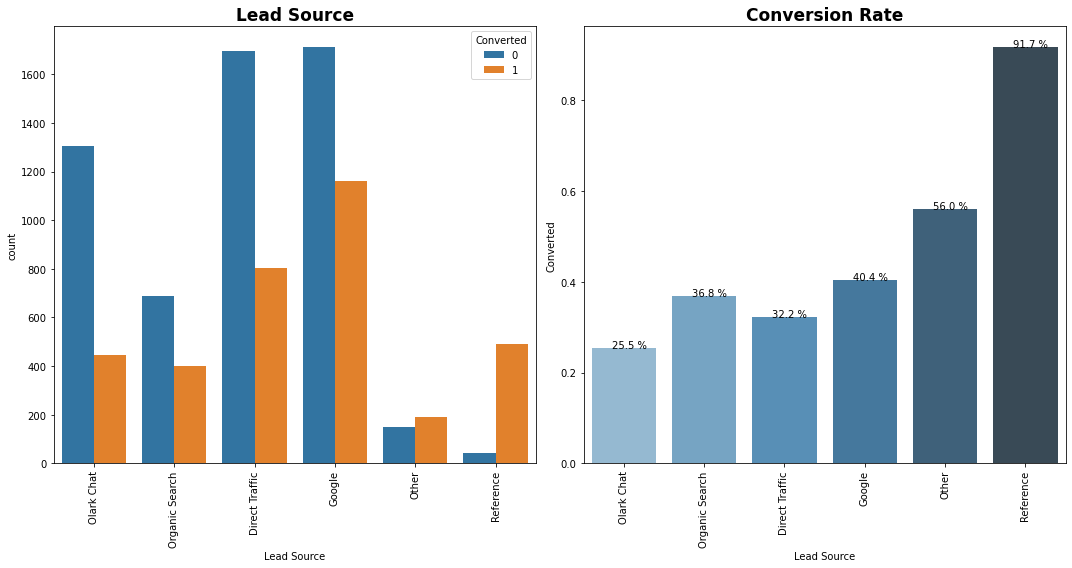

In [72]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.countplot(x = 'Lead Source', hue='Converted', data=ds)
plt.title('Lead Source', fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})
plt.xticks(rotation = 90)

# Rate of conversion
plt.subplot(1,2,2)
conversion_rate_plot('Lead Source', 'Converted', p = 'Blues_d')
plt.title('Conversion Rate', fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})
plt.xticks(rotation = 90)

plt.tight_layout()

- Mostly the source of lead are Google and Direct traffic but conversion rate of lead genrated through Reference is highest i.e. 91.7%

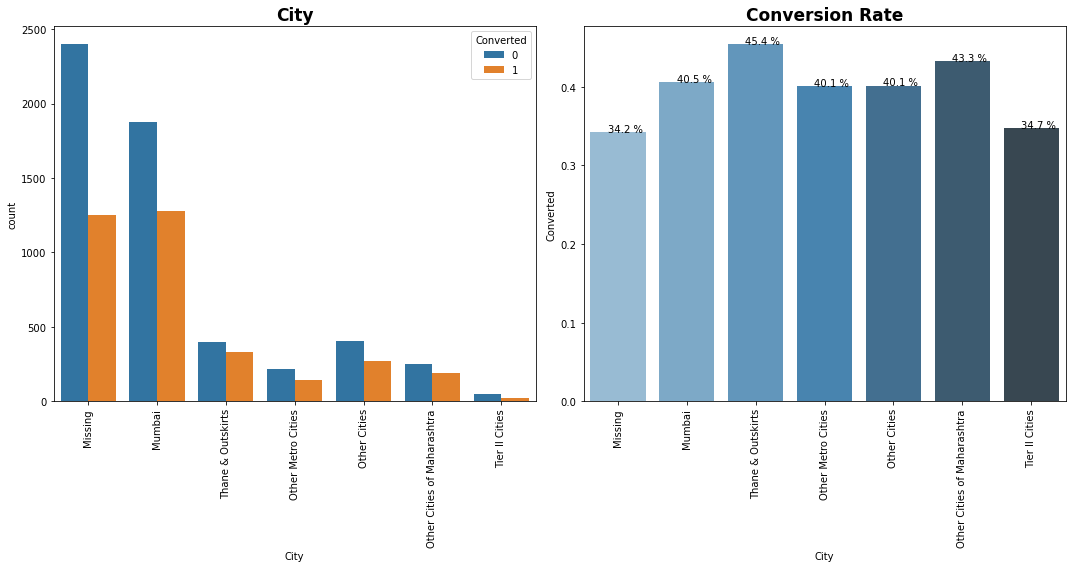

In [73]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.countplot(x = 'City', hue='Converted', data=ds)
plt.title('City', fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})
plt.xticks(rotation = 90)

# Rate of conversion
plt.subplot(1,2,2)
conversion_rate_plot('City', 'Converted', p = 'Blues_d')
plt.title('Conversion Rate', fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})
plt.xticks(rotation = 90)

plt.tight_layout()

- The no of customers are more in mumbai city but conversion rate is almost same for every city 

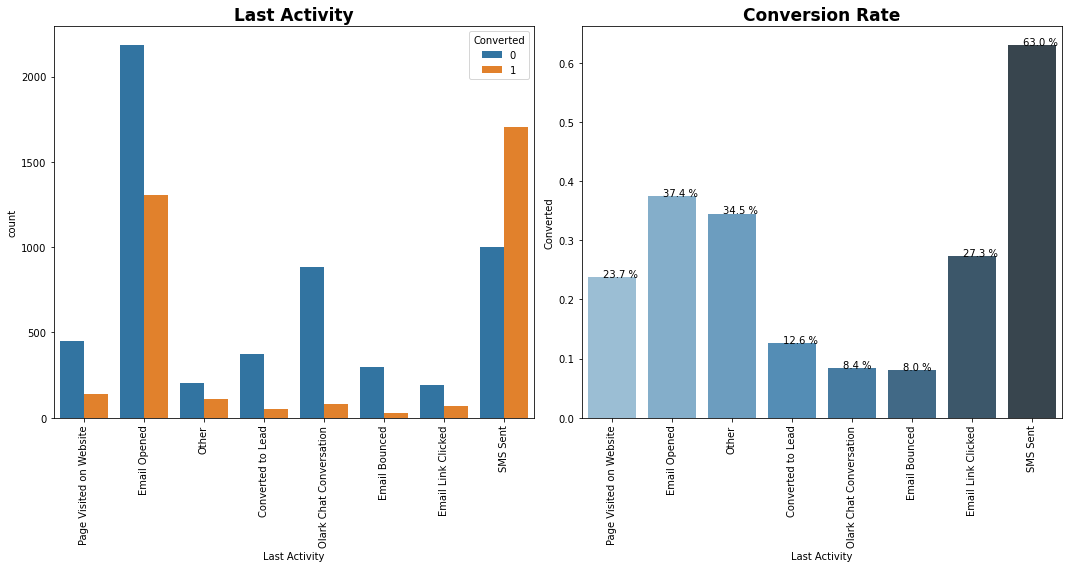

In [74]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.countplot(x = 'Last Activity', hue='Converted', data=ds)
plt.title('Last Activity', fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})
plt.xticks(rotation = 90)

# Rate of conversion
plt.subplot(1,2,2)
conversion_rate_plot('Last Activity', 'Converted', p = 'Blues_d')
plt.title('Conversion Rate', fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})
plt.xticks(rotation = 90)

plt.tight_layout()

- The conversion rate of SMS sent is highest

In [75]:
o = ds['Last Notable Activity'].value_counts(normalize=True)*100
o

Modified                        36.974697
Email Opened                    30.682068
SMS Sent                        23.575358
Page Visited on Website          3.168317
Olark Chat Conversation          2.002200
Email Link Clicked               1.870187
Email Bounced                    0.649065
Unsubscribed                     0.506051
Unreachable                      0.352035
Had a Phone Conversation         0.143014
Email Marked Spam                0.022002
Approached upfront               0.011001
Resubscribed to emails           0.011001
View in browser link Clicked     0.011001
Form Submitted on Website        0.011001
Email Received                   0.011001
Name: Last Notable Activity, dtype: float64

In [76]:
ds['Last Notable Activity'] = ds['Last Notable Activity'].replace(list(o[o<2].index), 'Other')

ds['Last Notable Activity'].value_counts(normalize=True)*100

Modified                   36.974697
Email Opened               30.682068
SMS Sent                   23.575358
Other                       3.597360
Page Visited on Website     3.168317
Olark Chat Conversation     2.002200
Name: Last Notable Activity, dtype: float64

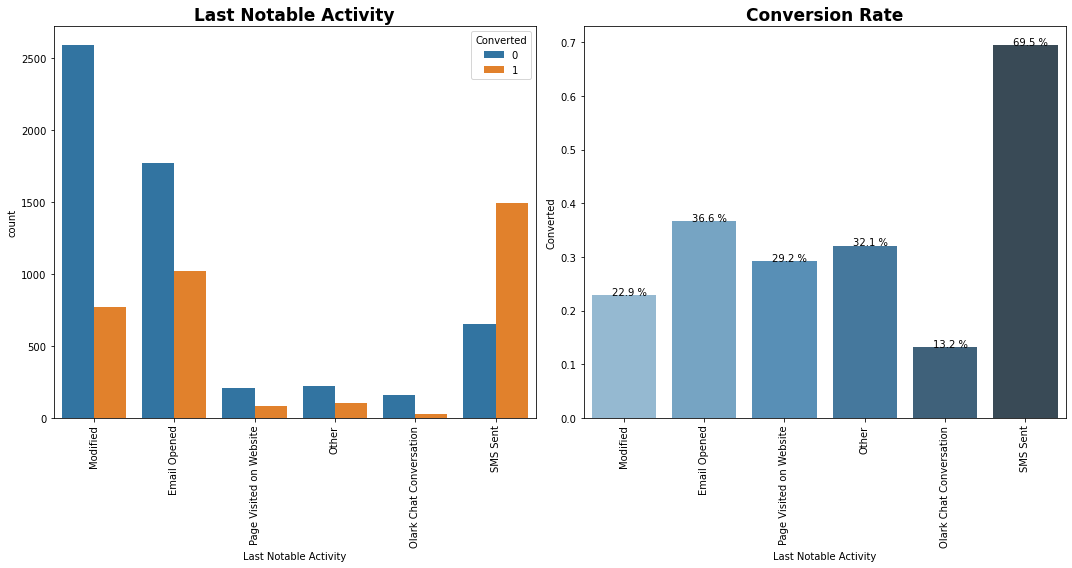

In [77]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.countplot(x = 'Last Notable Activity', hue='Converted', data=ds)
plt.title('Last Notable Activity', fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})
plt.xticks(rotation = 90)

# Rate of conversion
plt.subplot(1,2,2)
conversion_rate_plot('Last Notable Activity', 'Converted', p = 'Blues_d')
plt.title('Conversion Rate', fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})
plt.xticks(rotation = 90)

plt.tight_layout()

In [78]:
a= ds.Specialization.value_counts(normalize=True)*100
a

Missing                              36.963696
Finance Management                   10.550055
Human Resource Management             9.130913
Marketing Management                  9.119912
Operations Management                 5.478548
Business Administration               4.334433
IT Projects Management                3.960396
Supply Chain Management               3.751375
Banking, Investment And Insurance     3.608361
Media and Advertising                 2.178218
Travel and Tourism                    2.090209
International Business                1.903190
Healthcare Management                 1.683168
Hospitality Management                1.210121
E-COMMERCE                            1.188119
Retail Management                     1.045105
Rural and Agribusiness                0.770077
E-Business                            0.616062
Services Excellence                   0.418042
Name: Specialization, dtype: float64

In [79]:
ds.Specialization = ds.Specialization.replace(list(a[a<2].index), 'Other')

ds.Specialization.value_counts(normalize=True)*100

Missing                              36.963696
Finance Management                   10.550055
Human Resource Management             9.130913
Marketing Management                  9.119912
Other                                 8.833883
Operations Management                 5.478548
Business Administration               4.334433
IT Projects Management                3.960396
Supply Chain Management               3.751375
Banking, Investment And Insurance     3.608361
Media and Advertising                 2.178218
Travel and Tourism                    2.090209
Name: Specialization, dtype: float64

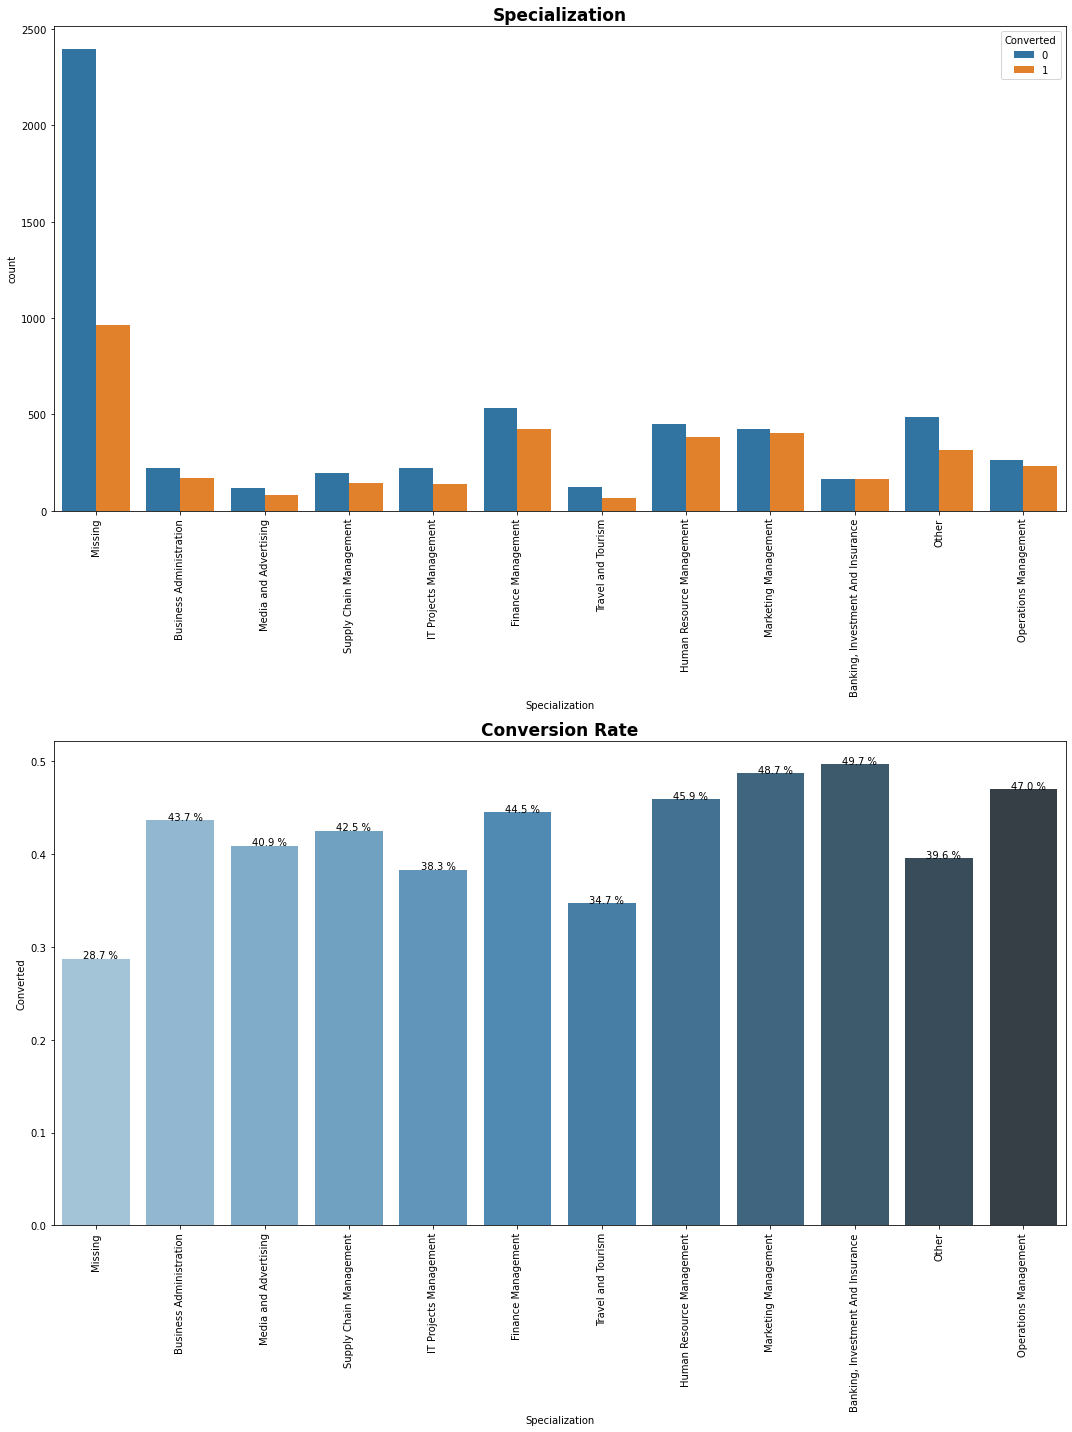

In [80]:
plt.figure(figsize = (15,20))
plt.subplot(2,1,1)
sns.countplot(x = 'Specialization', hue='Converted', data=ds)
plt.title('Specialization', fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})
plt.xticks(rotation = 90)

# Rate of conversion
plt.subplot(2,1,2)
conversion_rate_plot('Specialization', 'Converted', p = 'Blues_d')
plt.title('Conversion Rate', fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})
plt.xticks(rotation = 90)

plt.tight_layout()

In [81]:
b = ds.Tags.value_counts(normalize=True)*100
b

Unknown                                              36.347635
Will revert after reading the email                  22.431243
Ringing                                              12.937294
Interested in other courses                           5.599560
Already a student                                     5.071507
Closed by Horizzon                                    3.817382
switched off                                          2.607261
Busy                                                  2.024202
Lost to EINS                                          1.881188
Not doing further education                           1.507151
Interested  in full time MBA                          1.287129
Graduation in progress                                1.210121
invalid number                                        0.891089
Diploma holder (Not Eligible)                         0.693069
wrong number given                                    0.506051
opp hangup                                            0

In [82]:
ds.Tags = ds.Tags.replace(list(b[b<2].index), 'Other')

ds.Tags.value_counts(normalize=True)*100

Unknown                                36.347635
Will revert after reading the email    22.431243
Ringing                                12.937294
Other                                   9.163916
Interested in other courses             5.599560
Already a student                       5.071507
Closed by Horizzon                      3.817382
switched off                            2.607261
Busy                                    2.024202
Name: Tags, dtype: float64

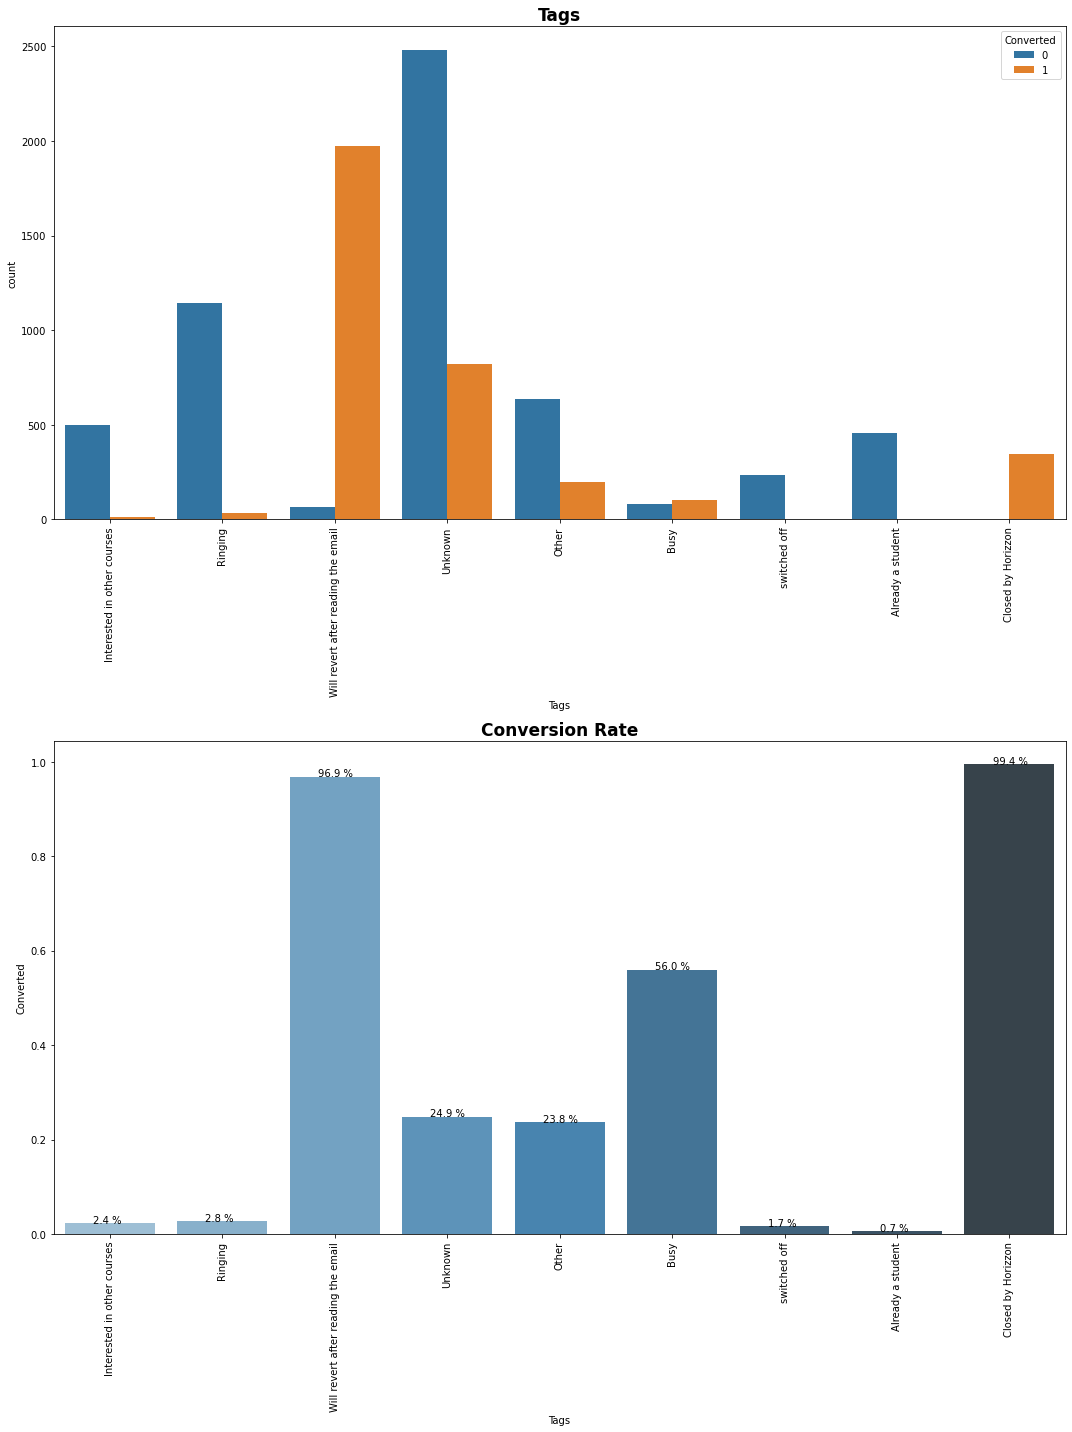

In [83]:
plt.figure(figsize = (15,20))
plt.subplot(2,1,1)
sns.countplot(x = 'Tags', hue='Converted', data=ds)
plt.title('Tags', fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})
plt.xticks(rotation = 90)

# Rate of conversion
plt.subplot(2,1,2)
conversion_rate_plot('Tags', 'Converted', p = 'Blues_d')
plt.title('Conversion Rate', fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})
plt.xticks(rotation = 90)

plt.tight_layout()

### Numerical Variable analysis

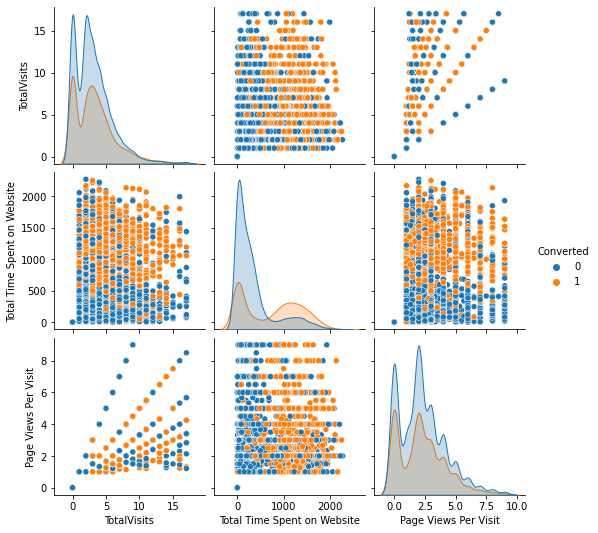

In [84]:
sns.pairplot(ds, hue= 'Converted')
plt.show()

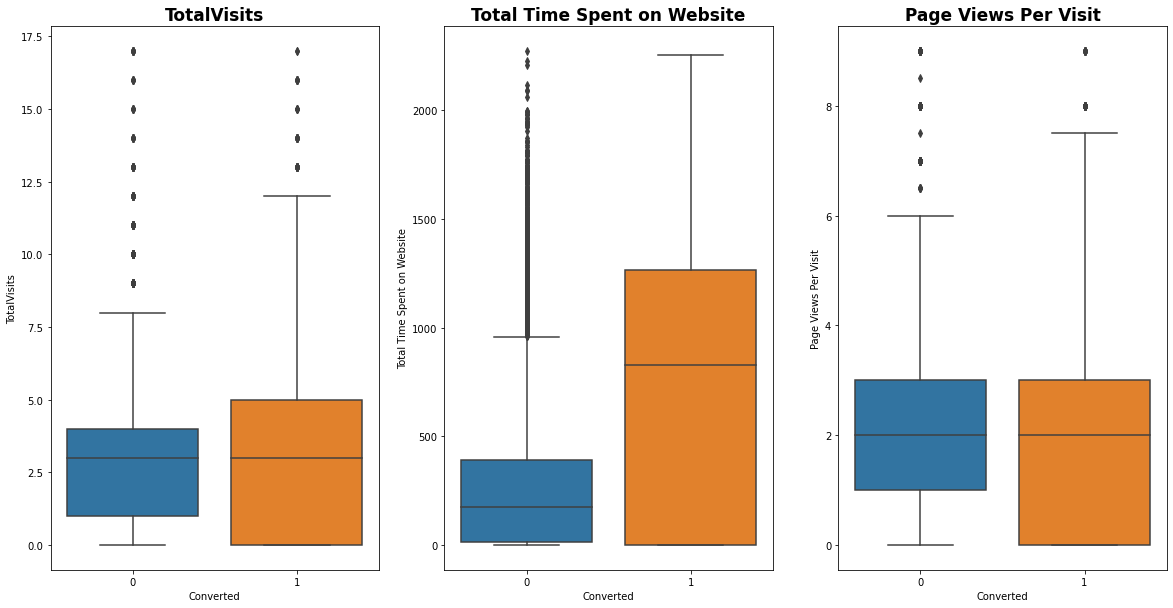

In [85]:
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
sns.boxplot(x = num_col[0], y = num_col[1], data = ds)
plt.title(num_col[1], fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})

plt.subplot(1,3,2)
sns.boxplot(x = num_col[0], y = num_col[2], data = ds)
plt.title(num_col[2], fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})

plt.subplot(1,3,3)
sns.boxplot(x = num_col[0], y = num_col[3], data = ds)
plt.title(num_col[3], fontdict={'fontsize': 17, 'fontweight': 'bold',  'color':'black'})
plt.show()

- As the customers spend more time on website the chance of conversion is more and mean and meadian of Total Visits and Page views per visit is almost same. 

# Data Prepairing

In [86]:
# Rechecking the data

ds.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,Interested in other courses,Missing,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Missing,Unemployed,Ringing,Missing,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [87]:
ds.shape

(9090, 14)

In [88]:
cat_col = list(ds.select_dtypes(include=object).columns)
cat_col

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [89]:
two_var

['Do Not Email', 'A free copy of Mastering The Interview']

In [90]:
# Changing 'Yes' and 'No' to 1 and 0

ds[two_var[0]].replace({'Yes': 1, 'No': 0}, inplace=True)
ds[two_var[1]].replace({'Yes': 1, 'No': 0}, inplace=True)

In [91]:
ds.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Missing,Unemployed,Interested in other courses,Missing,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Missing,Unemployed,Ringing,Missing,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other,Media and Advertising,Unemployed,Ringing,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Missing,Unemployed,Will revert after reading the email,Mumbai,0,Modified


In [92]:
cat_col = list(set(cat_col)- set(two_var))
cat_col

['Lead Origin',
 'What is your current occupation',
 'Lead Source',
 'Specialization',
 'City',
 'Tags',
 'Last Activity',
 'Last Notable Activity']

### Dummy Variable 

In [93]:
# Tags
dummy = pd.get_dummies(ds['Tags'], prefix='Tags')
dummy = dummy.drop(['Tags_Other'], axis = 1)
ds = pd.concat([ds, dummy], axis = 1)

# What is your current occupation
wo = pd.get_dummies(ds['What is your current occupation'], prefix='What is your current occupation')
wo = wo.drop(['What is your current occupation_Other'], axis = 1)
ds = pd.concat([ds, wo], axis = 1)

# Last Activity
l = pd.get_dummies(ds['Last Activity'], prefix='Last Activity')
l = l.drop(['Last Activity_Other'], axis = 1)
ds = pd.concat([ds, l], axis = 1)

# Lead Source
ls = pd.get_dummies(ds['Lead Source'], prefix='Lead Source')
ls = ls.drop(['Lead Source_Other'], axis = 1)
ds = pd.concat([ds, ls], axis = 1)

# Specialization
s = pd.get_dummies(ds['Specialization'], prefix='Specialization')
s = s.drop(['Specialization_Other'], axis = 1)
ds = pd.concat([ds, s], axis = 1)

# Lead Origin
lo = pd.get_dummies(ds['Lead Origin'], drop_first=True)
ds = pd.concat([ds, lo], axis = 1)

# Last Notable Activity
la = pd.get_dummies(ds['Last Notable Activity'], prefix='Last Notable Activity')
la = la.drop(['Last Notable Activity_Other'], axis = 1)
ds = pd.concat([ds, la], axis = 1)

# City
c = pd.get_dummies(ds['City'], drop_first=True)
ds = pd.concat([ds, c], axis = 1)


In [94]:
# Droping Extra columns

ds.drop(ds[cat_col], axis=1, inplace=True)

In [95]:
ds.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


# Data Spliting in train and test

In [96]:
ds_train, ds_test = train_test_split(ds, train_size= 0.7, random_state=100)

In [97]:
print(ds.shape)
print(ds_train.shape)
print(ds_test.shape)

(9090, 56)
(6363, 56)
(2727, 56)


## Rescaling the Features

I am using MinMax scaling to rescale the continuous variables to make the whole data in same scale.

In [98]:
scaler = MinMaxScaler()

In [99]:
# Apply scaler() to all the continuous variable columns

ds_train[num_col]= scaler.fit_transform(ds_train[num_col])

In [100]:
# Cheaking the data

ds_train.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities
count,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,...,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000,6363.000000
mean,0.077165,0.381581,0.185401,0.212901,0.249777,0.302845,0.050134,0.020431,0.037718,0.052962,...,0.372780,0.021216,0.033475,0.234638,0.345592,0.074493,0.050291,0.037404,0.079994,0.008172
std,0.266874,0.485813,0.169348,0.239946,0.207005,0.459525,0.218238,0.141479,0.190529,0.223976,...,0.483582,0.144116,0.179887,0.423806,0.475598,0.262592,0.218561,0.189764,0.271305,0.090037
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.058824,0.004842,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.176471,0.108275,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.294118,0.408891,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlations

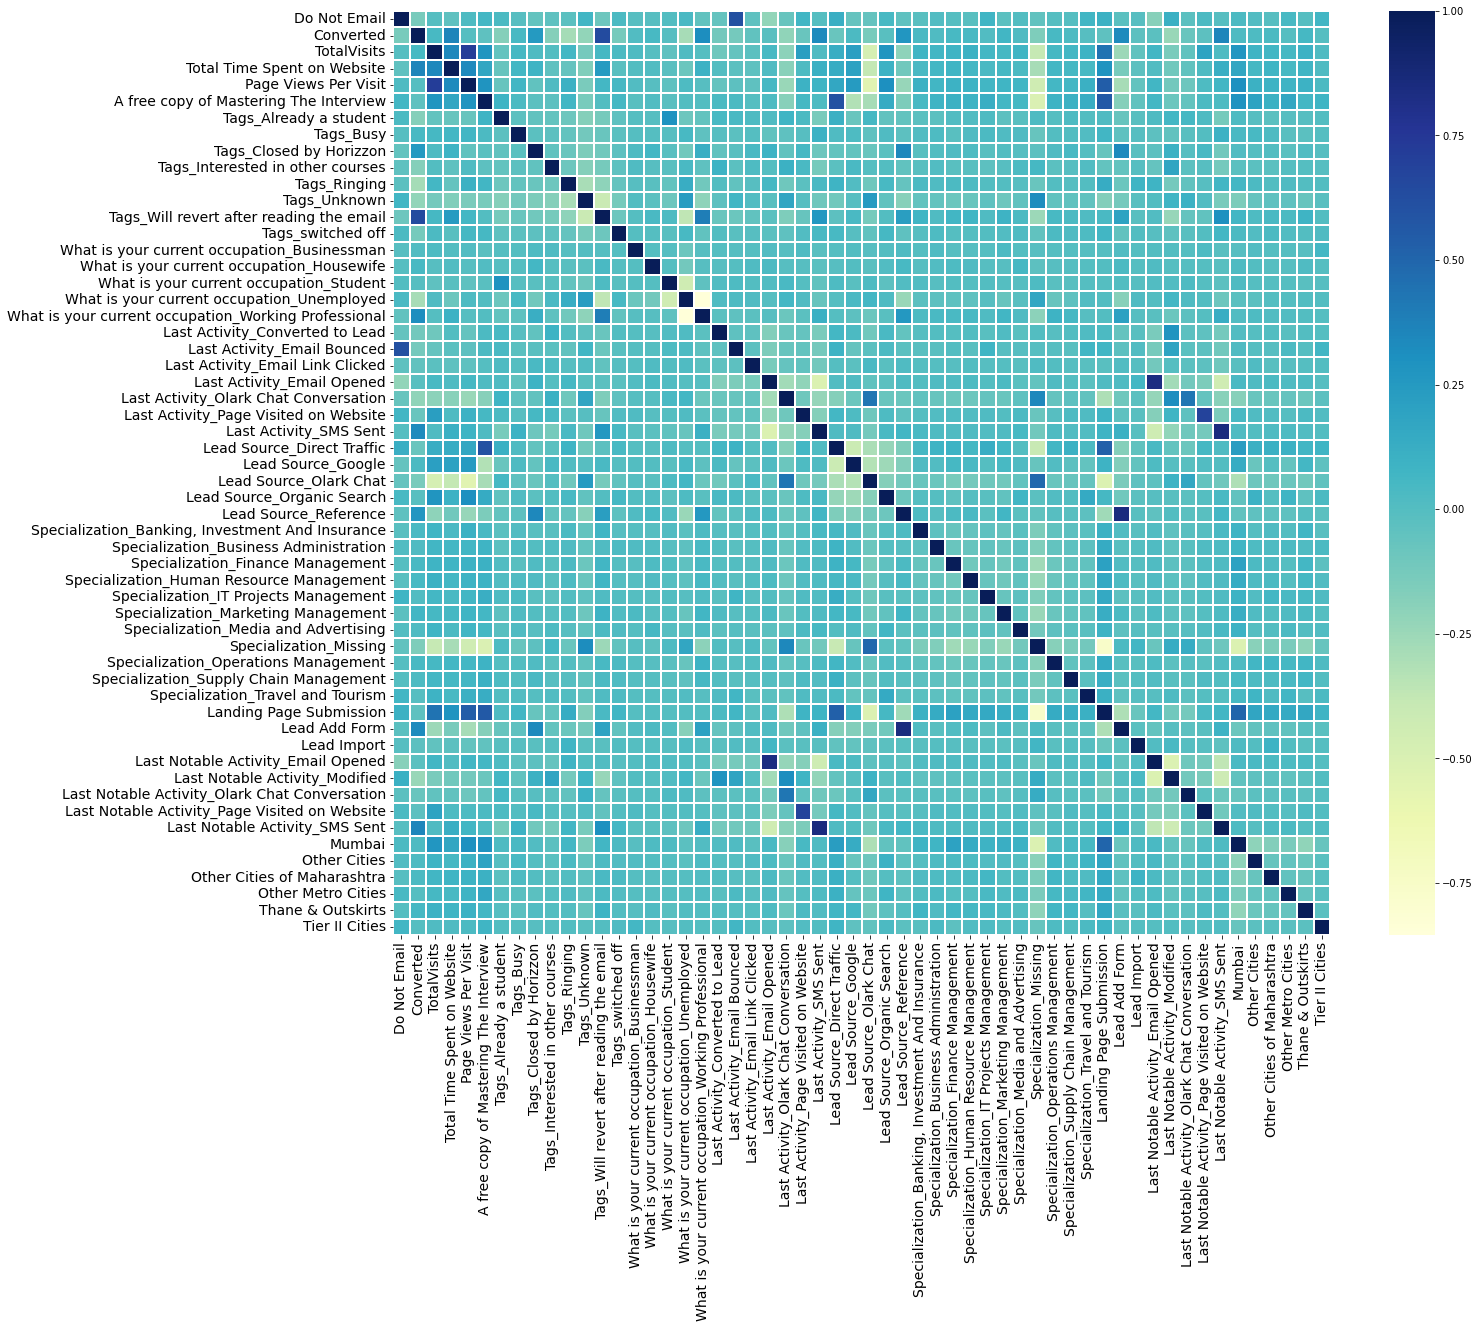

In [101]:
plt.figure(figsize=(21,17))
sns.heatmap(ds_train.corr(), cmap='YlGnBu', linewidth = 0.2)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

- These is high correlations in some between some variable

### Creating X and y

In [102]:
y_train = ds_train.pop('Converted')
X_train = ds_train

# Training the model by using RFE

In [103]:
lm = LogisticRegression()

lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [104]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 40),
 ('Tags_Already a student', True, 1),
 ('Tags_Busy', False, 27),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Interested in other courses', True, 1),
 ('Tags_Ringing', True, 1),
 ('Tags_Unknown', False, 13),
 ('Tags_Will revert after reading the email', True, 1),
 ('Tags_switched off', True, 1),
 ('What is your current occupation_Businessman', False, 5),
 ('What is your current occupation_Housewife', False, 22),
 ('What is your current occupation_Student', False, 18),
 ('What is your current occupation_Unemployed', False, 16),
 ('What is your current occupation_Working Professional', False, 3),
 ('Last Activity_Converted to Lead', False, 11),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', False, 29),
 ('Last Activity_Ola

In [105]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Lead Source_Reference',
       'Lead Add Form', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [106]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'Tags_Busy', 'Tags_Unknown',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Last Activity_SMS Sent', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertisi

## Building model using statsmodel, for the detailed statistics

In [107]:
# Creating X_train dataset with RFE selected variables

X_train_rfe = X_train[col]

In [108]:
# Adding the constant value

X_train_rfe = sm.add_constant(X_train_rfe)

# Model Building

In [109]:
# Running the Logistic Regression Model

lm = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())

# fitting

lm_model = lm.fit()

# Checking the Summary of the model

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1474.4
Date:                Sun, 11 Sep 2022   Deviance:                       2948.8
Time:                        17:25:05   Pearson chi2:                 7.22e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9037      0.098    -19.331      0.000      -2.097      -1.711
Do Not Email                                -1.0545      0.243     -4.331      0.000      -1.532      -0.577
TotalVisits                                  1.0042      0.388      2.587      0.010       0.243       1.765
Total Time Spent on Website                  4.0926      0.215     19.068      0.000       3.672       4.513
Page Views Per Visit                        -2.6521      0.357     -7.433      0.000      -3.351      -1.953
Tags_Already a student                      -3.2524      0.592     -5.498      0.000      -4.412      -2.093
Tags_Closed by Horizzon                      5.8743      0.746      7.875      0.000       4.412       7.336
Tags_Interested in other courses            -2.5484      0.403     -6.331      0.000      -3.337      -1.759
Tags_Ringing                                -3.4224      0.235    -14.568      0.000      -3.883      -2.962
Tags_Will revert after reading the email     4.0661      0.163     24.899      0.000       3.746       4.386
Tags_switched off                           -4.4793      0.734     -6.107      0.000      -5.917      -3.042
Last Activity_Email Bounced                 -1.4546      0.472     -3.082      0.002      -2.380      -0.530
Last Activity_Olark Chat Conversation       -1.0789      0.196     -5.504      0.000      -1.463      -0.695
Lead Source_Reference                       -3.5877      0.665     -5.397      0.000      -4.891      -2.285
Lead Add Form                                4.7953      0.576      8.320      0.000       3.666       5.925
Last Notable Activity_SMS Sent               2.2862      0.123     18.625      0.000       2.046       2.527
============================================================================================================
"""

## Checking VIF

In [110]:
# Importing Libraries for checking VIF values 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [111]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.30
14,Lead Add Form,3.88
13,Lead Source_Reference,3.80
4,Page Views Per Visit,2.22
2,TotalVisits,2.13
11,Last Activity_Email Bounced,1.66
1,Do Not Email,1.64
9,Tags_Will revert after reading the email,1.46
3,Total Time Spent on Website,1.30
6,Tags_Closed by Horizzon,1.30


Removing Lead Add Form column as it has Low P-Value but High VIF

In [112]:
X_train_rfe = X_train_rfe.drop('Lead Add Form', axis= 1)

## Model 2

In [113]:
# Running the Logistic Regression Model

lm = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())

# fitting

lm_model = lm.fit()

# Checking the Summary of the model

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1564.2
Date:                Sun, 11 Sep 2022   Deviance:                       3128.4
Time:                        17:25:05   Pearson chi2:                 7.35e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5587      0.090    -17.414      0.000      -1.734      -1.383
Do Not Email                                -0.9211      0.229     -4.030      0.000      -1.369      -0.473
TotalVisits                                  0.8114      0.383      2.119      0.034       0.061       1.562
Total Time Spent on Website                  3.8726      0.212     18.286      0.000       3.458       4.288
Page Views Per Visit                        -3.1773      0.354     -8.985      0.000      -3.870      -2.484
Tags_Already a student                      -3.3660      0.590     -5.702      0.000      -4.523      -2.209
Tags_Closed by Horizzon                      5.9166      0.738      8.013      0.000       4.469       7.364
Tags_Interested in other courses            -2.6192      0.401     -6.524      0.000      -3.406      -1.832
Tags_Ringing                                -3.4629      0.231    -15.007      0.000      -3.915      -3.011
Tags_Will revert after reading the email     4.0384      0.164     24.619      0.000       3.717       4.360
Tags_switched off                           -4.5971      0.733     -6.274      0.000      -6.033      -3.161
Last Activity_Email Bounced                 -1.4821      0.451     -3.285      0.001      -2.366      -0.598
Last Activity_Olark Chat Conversation       -1.3119      0.192     -6.836      0.000      -1.688      -0.936
Lead Source_Reference                        0.9060      0.348      2.605      0.009       0.224       1.588
Last Notable Activity_SMS Sent               2.3183      0.119     19.506      0.000       2.085       2.551
============================================================================================================
"""

In [114]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.03
4,Page Views Per Visit,2.20
2,TotalVisits,2.13
11,Last Activity_Email Bounced,1.65
1,Do Not Email,1.64
9,Tags_Will revert after reading the email,1.46
13,Lead Source_Reference,1.38
3,Total Time Spent on Website,1.29
6,Tags_Closed by Horizzon,1.28
14,Last Notable Activity_SMS Sent,1.20


Removing TotalVisits column as it has High P-Value

In [115]:
X_train_rfe = X_train_rfe.drop('TotalVisits', axis= 1)

## Model 3

In [116]:
# Running the Logistic Regression Model

lm = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())

# fitting

lm_model = lm.fit()

# Checking the Summary of the model

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1566.4
Date:                Sun, 11 Sep 2022   Deviance:                       3132.8
Time:                        17:25:06   Pearson chi2:                 7.34e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5261      0.088    -17.382      0.000      -1.698      -1.354
Do Not Email                                -0.9221      0.229     -4.025      0.000      -1.371      -0.473
Total Time Spent on Website                  3.9216      0.211     18.612      0.000       3.509       4.335
Page Views Per Visit                        -2.7163      0.275     -9.871      0.000      -3.256      -2.177
Tags_Already a student                      -3.3647      0.590     -5.700      0.000      -4.522      -2.208
Tags_Closed by Horizzon                      5.9422      0.737      8.062      0.000       4.498       7.387
Tags_Interested in other courses            -2.6444      0.402     -6.578      0.000      -3.432      -1.856
Tags_Ringing                                -3.4629      0.231    -14.992      0.000      -3.916      -3.010
Tags_Will revert after reading the email     4.0304      0.164     24.609      0.000       3.709       4.351
Tags_switched off                           -4.5705      0.732     -6.241      0.000      -6.006      -3.135
Last Activity_Email Bounced                 -1.5186      0.451     -3.365      0.001      -2.403      -0.634
Last Activity_Olark Chat Conversation       -1.3139      0.191     -6.877      0.000      -1.688      -0.939
Lead Source_Reference                        0.8846      0.348      2.545      0.011       0.203       1.566
Last Notable Activity_SMS Sent               2.2991      0.118     19.435      0.000       2.067       2.531
============================================================================================================
"""

In [117]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.90
10,Last Activity_Email Bounced,1.65
1,Do Not Email,1.64
8,Tags_Will revert after reading the email,1.46
12,Lead Source_Reference,1.37
3,Page Views Per Visit,1.28
2,Total Time Spent on Website,1.27
5,Tags_Closed by Horizzon,1.27
13,Last Notable Activity_SMS Sent,1.19
11,Last Activity_Olark Chat Conversation,1.17


Removing Lead Source_Reference column as it has High P-Value

In [118]:
X_train_rfe = X_train_rfe.drop('Lead Source_Reference', axis= 1)

## Model 4

In [119]:
# Running the Logistic Regression Model

lm = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())

# fitting

lm_model = lm.fit()

# Checking the Summary of the model

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1569.8
Date:                Sun, 11 Sep 2022   Deviance:                       3139.6
Time:                        17:25:06   Pearson chi2:                 7.10e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4851      0.086    -17.275      0.000      -1.654      -1.317
Do Not Email                                -0.9133      0.229     -3.995      0.000      -1.361      -0.465
Total Time Spent on Website                  3.9086      0.211     18.512      0.000       3.495       4.322
Page Views Per Visit                        -2.8418      0.272    -10.434      0.000      -3.376      -2.308
Tags_Already a student                      -3.3756      0.590     -5.718      0.000      -4.533      -2.219
Tags_Closed by Horizzon                      6.2008      0.727      8.532      0.000       4.776       7.625
Tags_Interested in other courses            -2.6308      0.402     -6.541      0.000      -3.419      -1.842
Tags_Ringing                                -3.4301      0.230    -14.883      0.000      -3.882      -2.978
Tags_Will revert after reading the email     4.1375      0.160     25.852      0.000       3.824       4.451
Tags_switched off                           -4.5745      0.732     -6.246      0.000      -6.010      -3.139
Last Activity_Email Bounced                 -1.5337      0.447     -3.433      0.001      -2.409      -0.658
Last Activity_Olark Chat Conversation       -1.3528      0.191     -7.072      0.000      -1.728      -0.978
Last Notable Activity_SMS Sent               2.2988      0.118     19.438      0.000       2.067       2.531
============================================================================================================
"""

In [120]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.67
10,Last Activity_Email Bounced,1.65
1,Do Not Email,1.64
8,Tags_Will revert after reading the email,1.34
2,Total Time Spent on Website,1.24
3,Page Views Per Visit,1.21
12,Last Notable Activity_SMS Sent,1.19
7,Tags_Ringing,1.16
11,Last Activity_Olark Chat Conversation,1.16
5,Tags_Closed by Horizzon,1.07


Removing Last Activity_Email Bounced column as it has High P-Value

In [121]:
X_train_rfe = X_train_rfe.drop('Last Activity_Email Bounced', axis= 1)

## Model 5

In [122]:
# Running the Logistic Regression Model

lm = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())

# fitting

lm_model = lm.fit()

# Checking the Summary of the model

lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1576.6
Date:                Sun, 11 Sep 2022   Deviance:                       3153.2
Time:                        17:25:07   Pearson chi2:                 7.11e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5031      0.086    -17.477      0.000      -1.672      -1.335
Do Not Email                                -1.3817      0.195     -7.095      0.000      -1.763      -1.000
Total Time Spent on Website                  3.8737      0.210     18.431      0.000       3.462       4.286
Page Views Per Visit                        -2.8003      0.273    -10.275      0.000      -3.334      -2.266
Tags_Already a student                      -3.3749      0.590     -5.720      0.000      -4.531      -2.219
Tags_Closed by Horizzon                      6.1190      0.717      8.535      0.000       4.714       7.524
Tags_Interested in other courses            -2.6245      0.403     -6.520      0.000      -3.413      -1.836
Tags_Ringing                                -3.4491      0.231    -14.921      0.000      -3.902      -2.996
Tags_Will revert after reading the email     4.1352      0.159     25.962      0.000       3.823       4.447
Tags_switched off                           -4.5582      0.733     -6.219      0.000      -5.995      -3.122
Last Activity_Olark Chat Conversation       -1.3267      0.191     -6.939      0.000      -1.701      -0.952
Last Notable Activity_SMS Sent               2.3596      0.118     19.992      0.000       2.128       2.591
============================================================================================================
"""

In [123]:
# Checking VIF

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.63
8,Tags_Will revert after reading the email,1.34
2,Total Time Spent on Website,1.24
3,Page Views Per Visit,1.21
11,Last Notable Activity_SMS Sent,1.17
7,Tags_Ringing,1.16
10,Last Activity_Olark Chat Conversation,1.16
5,Tags_Closed by Horizzon,1.07
6,Tags_Interested in other courses,1.07
4,Tags_Already a student,1.06


Now the model looks good as all the variable have low P-Value and low VIF.

# Model Evaluation

In [124]:
# Predicting train dataset with final model

y_train_pred= lm_model.predict(X_train_rfe)


#creating a dataframe to store Lead Score, y_train, and predictions together
lr_pred = pd.DataFrame({'Converted': y_train, 'Convert_prob': y_train_pred, 'Lead Score': (y_train_pred*100).round(2)})

#obtaining results for a cut-off of 0.5
lr_pred['predicted'] = lr_pred['Convert_prob'].map(lambda x: 1 if x > 0.5 else 0)
lr_pred.head()

,Converted,Convert_prob,Lead Score,predicted
302,0.0,0.141625,14.16,0
6087,0.0,0.052907,5.29,0
1033,0.0,0.094703,9.47,0
7656,0.0,0.005267,0.53,0
3241,1.0,0.998048,99.80,1


In [125]:
# classification report

print(classification_report(lr_pred['Converted'], lr_pred['predicted']))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      3935
         1.0       0.91      0.83      0.87      2428

    accuracy                           0.90      6363
   macro avg       0.90      0.89      0.90      6363
weighted avg       0.90      0.90      0.90      6363




Overall Accuracy Score : 0.9




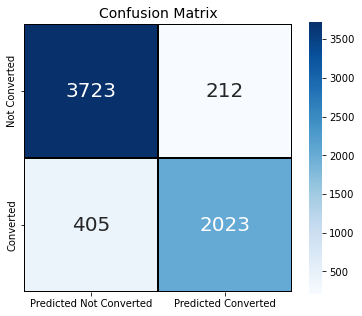

In [126]:
# Confusion Matrix for train data

cm = confusion_matrix(lr_pred['Converted'], lr_pred['predicted'])
cm_df = pd.DataFrame(data = cm)

plt.figure(figsize = (6,5))
sns.heatmap(cm_df, fmt='g', 
            yticklabels=['Not Converted', 'Converted'],
            xticklabels=['Predicted Not Converted', 'Predicted Converted'],
            annot=True,
            linewidths=.2,linecolor="k", cmap = "Blues", square=True, annot_kws={"fontsize":20})
plt.title('Confusion Matrix', fontsize=14)
print('\nOverall Accuracy Score : {}\n\n'.format(accuracy_score(lr_pred['Converted'], lr_pred['predicted']).round(2)))
plt.show()

## ROC Curve

In [127]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

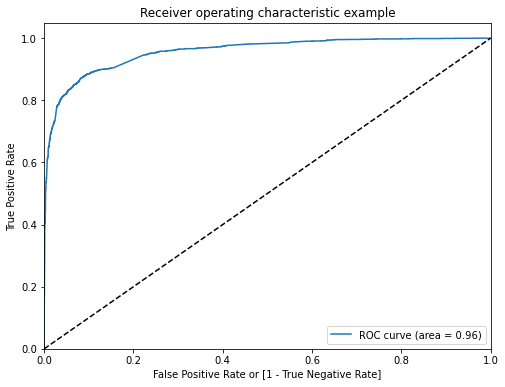

In [128]:
plot_roc(lr_pred['Converted'], lr_pred['Convert_prob'])

## Optimal cutoffs

In [129]:
cut = [float(x)/10 for x in range(0,11)]

for i in cut:
    lr_pred[i] = lr_pred['Convert_prob'].map(lambda x: 1 if x>i else 0)
lr_pred.head()    

,Converted,Convert_prob,Lead Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
302,0.0,0.141625,14.16,0,1,1,0,0,0,0,0,0,0,0,0
6087,0.0,0.052907,5.29,0,1,0,0,0,0,0,0,0,0,0,0
1033,0.0,0.094703,9.47,0,1,0,0,0,0,0,0,0,0,0,0
7656,0.0,0.005267,0.53,0,1,0,0,0,0,0,0,0,0,0,0
3241,1.0,0.998048,99.80,1,1,1,1,1,1,1,1,1,1,1,0


In [130]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['Prob_thresh','Accuracy','Recall','Specificity'])

num = [float(x)/10 for x in range(11)]
for i in num:
    cm1 = confusion_matrix(lr_pred['Converted'], lr_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Prob_thresh  Accuracy    Recall  Specificity
0.0          0.0  0.381581  1.000000     0.000000
0.1          0.1  0.765362  0.969110     0.639644
0.2          0.2  0.877102  0.900741     0.862516
0.3          0.3  0.896590  0.882208     0.905464
0.4          0.4  0.899576  0.856672     0.926048
0.5          0.5  0.903033  0.833196     0.946125
0.6          0.6  0.902247  0.805601     0.961881
0.7          0.7  0.897690  0.778418     0.971283
0.8          0.8  0.878831  0.711697     0.981957
0.9          0.9  0.860443  0.651565     0.989327
1.0          1.0  0.618419  0.000000     1.000000


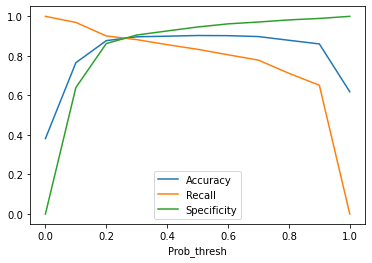

In [131]:
cutoff_df.plot.line(x = 'Prob_thresh', y = ['Accuracy', 'Recall', 'Specificity'])
plt.show()

* As you can see that around 0.25, you get the optimal values of the three metrics. So let's choose 0.25 as our cutoff now.

In [161]:
#confusion matrix for cut-off of 0.25
y_train_pred = np.array([1 if i > 0.25 else 0 for i in y_train_pred])
lr_pred['predicted'] = y_train_pred
print('\nOverall Accuracy Score : {}\n'.format((accuracy_score(y_train, y_train_pred)*100).round(2)))
print('Train confusion matrix: \n\n {}'.format(confusion_matrix(y_train, y_train_pred)))


Overall Accuracy Score : 89.08

Train confusion matrix: 

 [[3503  432]
 [ 263 2165]]


In [142]:
#classification report
print('\nIn-sample Precision Score   : {}%\n'.format((precision_score(y_train, y_train_pred)*100).round(2)))
print('In-sample Recall Score      : {}%\n'.format((recall_score(y_train, y_train_pred)*100).round(2)))
print('In-sample Sencifitity Score      : {}%\n'.format(((y_train, y_train_pred)*100).round(2)))
print('In-sample F-measure         : {}%\n'.format((f1_score(y_train, y_train_pred)*100).round(2)))


In-sample Precision Score   : 83.37%

In-sample Recall Score      : 89.17%

In-sample F-measure         : 86.17%



# Prediction on Test Set 

In [145]:
# Rescaling the test data

ds_test[num_col]= scaler.transform(ds_test[num_col])

In [146]:
# Rechecking the data

ds_test.describe()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts,Tier II Cities
count,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,...,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000,2727.000000
mean,0.079208,0.391272,0.183265,0.213684,0.255274,0.319399,0.052072,0.019802,0.039237,0.063073,...,0.362670,0.017235,0.027503,0.238357,0.349468,0.073707,0.046938,0.047305,0.080675,0.007334
std,0.270113,0.488125,0.169951,0.243037,0.213630,0.466329,0.222213,0.139345,0.194195,0.243139,...,0.480859,0.130170,0.163573,0.426157,0.476890,0.261342,0.211545,0.212329,0.272385,0.085340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.058824,0.002201,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.176471,0.108275,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.235294,0.410431,0.365556,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.971391,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
y_test = ds_test.pop('Converted')
X_test = ds_test

In [148]:
X_train_rfe = X_train_rfe.drop('const', axis= 1)

# Creating X_test dataframe by dropping variables from X_test

X_test = X_test[X_train_rfe.columns]

In [149]:
# Adding constant variable 

X_test = sm.add_constant(X_test)

In [ ]:
y_test_pred = lm_model.predict(X_test)

In [153]:
# Predicting train dataset with final model

y_test_pred= lm_model.predict(X_test)


#creating a dataframe to store Lead Score, y_train, and predictions together
lr_test = pd.DataFrame({'Converted': y_test, 'Convert_prob': y_test_pred, 'Lead Score': (y_test_pred*100).round(2)})

#obtaining results for a cut-off of 0.25
lr_test['predicted'] = lr_test['Convert_prob'].map(lambda x: 1 if x > 0.25 else 0)
lr_test.head()

,Converted,Convert_prob,Lead Score,predicted
6906,1.0,0.999069,99.91,1
1873,0.0,0.011742,1.17,0
771,0.0,0.000870,0.09,0
4495,0.0,0.002596,0.26,0
9061,1.0,0.715664,71.57,1



Overall Accuracy : 89.88%




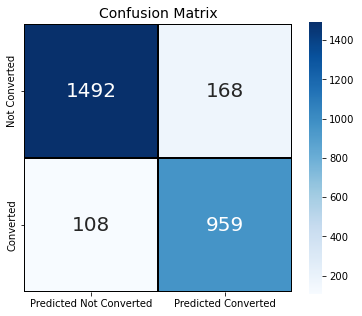

In [155]:
#Confusion Matrix for test data
cm = confusion_matrix(lr_test['Converted'], lr_test['predicted'])
cm_df = pd.DataFrame(data = cm)

plt.figure(figsize = (6,5))
sns.heatmap(cm_df, fmt='g', 
            yticklabels=['Not Converted', 'Converted'],
            xticklabels=['Predicted Not Converted', 'Predicted Converted'],
            annot=True,
            linewidths = 0.2, linecolor="k", cmap = "Blues", square=True, annot_kws={"fontsize":20})
plt.title('Confusion Matrix', fontsize=14)
print('\nOverall Accuracy : {}%\n\n'.format((accuracy_score(lr_test['Converted'], lr_test['predicted'])*100).round(2)))
plt.show()

In [156]:
# Classification report

print('\nTest Precision Score   : {}%\n'.format((precision_score(lr_test['Converted'], lr_test['predicted'])*100).round(2)))
print('Test Recall Score      : {}%\n'.format((recall_score(lr_test['Converted'], lr_test['predicted'])*100).round(2)))
print('Test F-measure         : {}%\n'.format((f1_score(lr_test['Converted'], lr_test['predicted'])*100).round(2)))


Test Precision Score   : 85.09%

Test Recall Score      : 89.88%

Test F-measure         : 87.42%



# Final model

In [157]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6363
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1576.6
Date:                Sun, 11 Sep 2022   Deviance:                       3153.2
Time:                        17:58:37   Pearson chi2:                 7.11e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5031      0.086    -17.477      0.000      -1.672      -1.335
Do Not Email                                -1.3817      0.195     -7.095      0.000      -1.763      -1.000
Total Time Spent on Website                  3.8737      0.210     18.431      0.000       3.462       4.286
Page Views Per Visit                        -2.8003      0.273    -10.275      0.000      -3.334      -2.266
Tags_Already a student                      -3.3749      0.590     -5.720      0.000      -4.531      -2.219
Tags_Closed by Horizzon                      6.1190      0.717      8.535      0.000       4.714       7.524
Tags_Interested in other courses            -2.6245      0.403     -6.520      0.000      -3.413      -1.836
Tags_Ringing                                -3.4491      0.231    -14.921      0.000      -3.902      -2.996
Tags_Will revert after reading the email     4.1352      0.159     25.962      0.000       3.823       4.447
Tags_switched off                           -4.5582      0.733     -6.219      0.000      -5.995      -3.122
Last Activity_Olark Chat Conversation       -1.3267      0.191     -6.939      0.000      -1.701      -0.952
Last Notable Activity_SMS Sent               2.3596      0.118     19.992      0.000       2.128       2.591
============================================================================================================
"""

In [160]:
lm_model.params

const                                      -1.503138
Do Not Email                               -1.381719
Total Time Spent on Website                 3.873677
Page Views Per Visit                       -2.800273
Tags_Already a student                     -3.374861
Tags_Closed by Horizzon                     6.118976
Tags_Interested in other courses           -2.624466
Tags_Ringing                               -3.449071
Tags_Will revert after reading the email    4.135154
Tags_switched off                          -4.558180
Last Activity_Olark Chat Conversation      -1.326722
Last Notable Activity_SMS Sent              2.359617
dtype: float64

### Train Set:

> Accuracy Score    : 89.08%

> Precision Score   : 83.37%

> Recall Score      : 89.17%

> F-measure         : 86.17%

### Test Set:

> Accuracy Score    : 89.88%

> Precision Score   : 85.09%

> Recall Score      : 89.88%

> F-measure         : 87.42%

#### Top 3 variables in my model which contribute most towards the probability of a lead getting converted:

* Tags_Closed by Horizzon  
* Tags_Will revert after reading the email
* Total Time Spent on Website  